# Always Guess the Middle Strategy

This notebook analyzes a simple but potentially effective guessing strategy: **always guess the middle value (0.5)**.

## Problem Setup

We have the same probability distribution as before:
- **Actual values**: 0, 0.25, 0.5, 0.75, 1
- **Probabilities**: 5%, 20%, 50%, 20%, 5% respectively

## Strategy: Always Guess 0.5

Instead of guessing randomly from a distribution, we will:
1. **Always predict 0.5** regardless of any other information
2. Calculate the expected error mathematically
3. Compare this with other strategies

## Mathematical Analysis

When we always guess 0.5, our error for each possible actual value is:
- If actual = 0: error = |0.5 - 0| = 0.5
- If actual = 0.25: error = |0.5 - 0.25| = 0.25  
- If actual = 0.5: error = |0.5 - 0.5| = 0.0
- If actual = 0.75: error = |0.5 - 0.75| = 0.25
- If actual = 1: error = |0.5 - 1| = 0.5

The expected error is the weighted average of these errors according to the probability distribution.

In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

# Set style for better plots
plt.style.use('default')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

print("Libraries imported successfully!")

Libraries imported successfully!


In [2]:
# Define the probability distribution
values = {
    0: 0.05, 
    0.25: 0.2,
    0.5: 0.5,
    0.75: 0.2,
    1: 0.05
}

print("Probability Distribution:")
print("=" * 30)
for value, prob in values.items():
    print(f"Value {value:4}: {prob*100:5.1f}% probability")
    
print(f"\nTotal probability: {sum(values.values()):.1f}")

Probability Distribution:
Value    0:   5.0% probability
Value 0.25:  20.0% probability
Value  0.5:  50.0% probability
Value 0.75:  20.0% probability
Value    1:   5.0% probability

Total probability: 1.0


## Theoretical Analysis

### Expected Error Calculation

For the "always guess 0.5" strategy, we can calculate the expected error analytically:

**Formula:**
```
E[error] = Σ P(actual = a) × |0.5 - a|
```

Where:
- P(actual = a) is the probability of each actual value
- |0.5 - a| is the absolute error when guessing 0.5 and actual value is a

Let's calculate this step by step:

In [3]:
def calculate_middle_strategy_error():
    """
    Calculate the expected error for always guessing 0.5
    """
    guess = 0.5
    total_expected_error = 0
    
    print("Always Guess 0.5 Strategy - Error Analysis:")
    print("=" * 50)
    print(f"Our guess is always: {guess}")
    print("\nError breakdown by actual value:")
    
    errors_breakdown = []
    
    for actual_value, probability in values.items():
        error = abs(guess - actual_value)
        weighted_error = error * probability
        total_expected_error += weighted_error
        
        errors_breakdown.append({
            'actual_value': actual_value,
            'probability': probability,
            'error': error,
            'weighted_error': weighted_error
        })
        
        print(f"  Actual {actual_value:4}: |{guess} - {actual_value}| = {error:.3f}, "
              f"weighted by {probability:.2f} = {weighted_error:.4f}")
    
    print(f"\nTotal Expected Error: {total_expected_error:.4f}")
    
    return total_expected_error, errors_breakdown

expected_error, breakdown = calculate_middle_strategy_error()

Always Guess 0.5 Strategy - Error Analysis:
Our guess is always: 0.5

Error breakdown by actual value:
  Actual    0: |0.5 - 0| = 0.500, weighted by 0.05 = 0.0250
  Actual 0.25: |0.5 - 0.25| = 0.250, weighted by 0.20 = 0.0500
  Actual  0.5: |0.5 - 0.5| = 0.000, weighted by 0.50 = 0.0000
  Actual 0.75: |0.5 - 0.75| = 0.250, weighted by 0.20 = 0.0500
  Actual    1: |0.5 - 1| = 0.500, weighted by 0.05 = 0.0250

Total Expected Error: 0.1500


## Monte Carlo Verification

Let's verify our theoretical calculation with a Monte Carlo simulation:

In [4]:
def monte_carlo_middle_strategy(n_trials=100000):
    """
    Verify the analytical result with Monte Carlo simulation
    """
    np.random.seed(42)  # For reproducibility
    
    # Generate actual values according to the probability distribution
    actual_values_list = list(values.keys())
    probabilities_list = list(values.values())
    actual_values_sampled = np.random.choice(
        actual_values_list, 
        size=n_trials, 
        p=probabilities_list
    )
    
    # Our strategy: always guess 0.5
    guesses = np.full(n_trials, 0.5)
    
    # Calculate errors
    errors = np.abs(guesses - actual_values_sampled)
    
    mean_error = np.mean(errors)
    std_error = np.std(errors)
    
    print("Monte Carlo Simulation Results:")
    print("=" * 40)
    print(f"Number of trials: {n_trials:,}")
    print(f"Mean error: {mean_error:.4f}")
    print(f"Standard deviation: {std_error:.4f}")
    print(f"Min error: {np.min(errors):.4f}")
    print(f"Max error: {np.max(errors):.4f}")
    print(f"Median error: {np.median(errors):.4f}")
    
    print(f"\nComparison with Theory:")
    print(f"  Theoretical: {expected_error:.4f}")
    print(f"  Monte Carlo: {mean_error:.4f}")
    print(f"  Difference:  {abs(expected_error - mean_error):.6f}")
    
    return errors, actual_values_sampled

errors, actual_values_sampled = monte_carlo_middle_strategy()

Monte Carlo Simulation Results:
Number of trials: 100,000
Mean error: 0.1496
Standard deviation: 0.1653
Min error: 0.0000
Max error: 0.5000
Median error: 0.0000

Comparison with Theory:
  Theoretical: 0.1500
  Monte Carlo: 0.1496
  Difference:  0.000447


## Visualization and Analysis

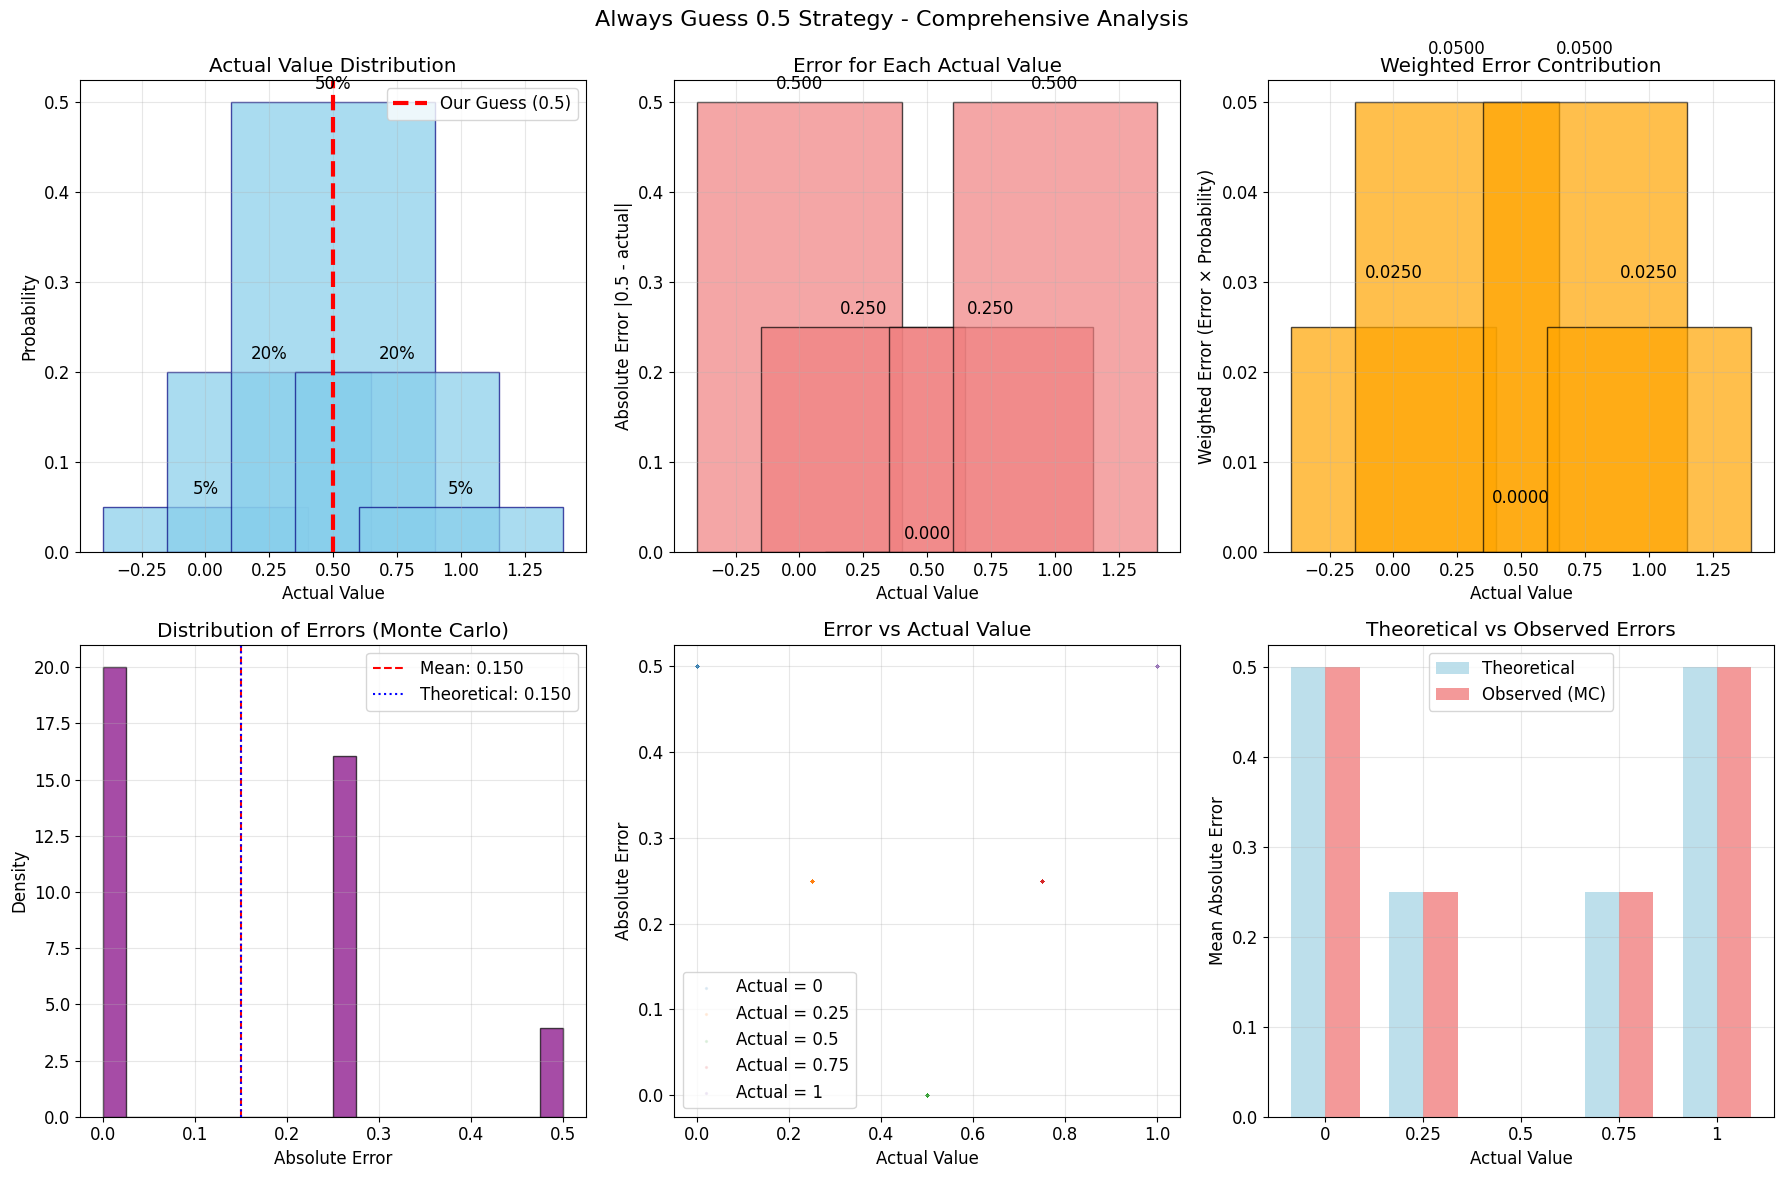

In [5]:
# Create comprehensive visualization
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Always Guess 0.5 Strategy - Comprehensive Analysis', fontsize=16, y=0.98)

# Plot 1: Probability distribution of actual values
actual_vals = list(values.keys())
probabilities = list(values.values())

axes[0, 0].bar(actual_vals, probabilities, alpha=0.7, color='skyblue', edgecolor='navy')
axes[0, 0].axvline(x=0.5, color='red', linestyle='--', linewidth=3, label='Our Guess (0.5)')
axes[0, 0].set_title('Actual Value Distribution')
axes[0, 0].set_xlabel('Actual Value')
axes[0, 0].set_ylabel('Probability')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Add probability labels on bars
for val, prob in zip(actual_vals, probabilities):
    axes[0, 0].text(val, prob + 0.01, f'{prob*100:.0f}%', ha='center', va='bottom')

# Plot 2: Error for each actual value
errors_per_value = [abs(0.5 - val) for val in actual_vals]
colors = ['lightcoral' if err > 0 else 'lightgreen' for err in errors_per_value]

bars = axes[0, 1].bar(actual_vals, errors_per_value, alpha=0.7, color=colors, edgecolor='black')
axes[0, 1].set_title('Error for Each Actual Value')
axes[0, 1].set_xlabel('Actual Value')
axes[0, 1].set_ylabel('Absolute Error |0.5 - actual|')
axes[0, 1].grid(True, alpha=0.3)

# Add error labels on bars
for val, err in zip(actual_vals, errors_per_value):
    axes[0, 1].text(val, err + 0.01, f'{err:.3f}', ha='center', va='bottom')

# Plot 3: Weighted contribution to expected error
weighted_errors = [abs(0.5 - val) * prob for val, prob in values.items()]

axes[0, 2].bar(actual_vals, weighted_errors, alpha=0.7, color='orange', edgecolor='black')
axes[0, 2].set_title('Weighted Error Contribution')
axes[0, 2].set_xlabel('Actual Value')
axes[0, 2].set_ylabel('Weighted Error (Error × Probability)')
axes[0, 2].grid(True, alpha=0.3)

# Add weighted error labels
for val, w_err in zip(actual_vals, weighted_errors):
    axes[0, 2].text(val, w_err + 0.005, f'{w_err:.4f}', ha='center', va='bottom')

# Plot 4: Distribution of errors from Monte Carlo
axes[1, 0].hist(errors, bins=20, alpha=0.7, color='purple', edgecolor='black', density=True)
axes[1, 0].axvline(x=np.mean(errors), color='red', linestyle='--', 
                   label=f'Mean: {np.mean(errors):.3f}')
axes[1, 0].axvline(x=expected_error, color='blue', linestyle=':', 
                   label=f'Theoretical: {expected_error:.3f}')
axes[1, 0].set_title('Distribution of Errors (Monte Carlo)')
axes[1, 0].set_xlabel('Absolute Error')
axes[1, 0].set_ylabel('Density')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Plot 5: Error vs Actual Value (scatter plot)
for actual_val in values.keys():
    mask = actual_values_sampled == actual_val
    if np.any(mask):
        y_values = errors[mask]
        x_values = [actual_val] * len(y_values)
        axes[1, 1].scatter(x_values, y_values, alpha=0.1, s=2, 
                          label=f'Actual = {actual_val}')

axes[1, 1].set_title('Error vs Actual Value')
axes[1, 1].set_xlabel('Actual Value')
axes[1, 1].set_ylabel('Absolute Error')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

# Plot 6: Comparison with theoretical values
theoretical_errors = [abs(0.5 - val) for val in actual_vals]
observed_errors = []

for actual_val in sorted(values.keys()):
    mask = actual_values_sampled == actual_val
    if np.any(mask):
        observed_errors.append(np.mean(errors[mask]))
    else:
        observed_errors.append(0)

x = np.arange(len(actual_vals))
width = 0.35

axes[1, 2].bar(x - width/2, theoretical_errors, width, label='Theoretical', 
               alpha=0.8, color='lightblue')
axes[1, 2].bar(x + width/2, observed_errors, width, label='Observed (MC)', 
               alpha=0.8, color='lightcoral')

axes[1, 2].set_title('Theoretical vs Observed Errors')
axes[1, 2].set_xlabel('Actual Value')
axes[1, 2].set_ylabel('Mean Absolute Error')
axes[1, 2].set_xticks(x)
axes[1, 2].set_xticklabels(actual_vals)
axes[1, 2].legend()
axes[1, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Detailed Statistical Analysis

In [6]:
print("=" * 60)
print("DETAILED STATISTICAL ANALYSIS")
print("=" * 60)

# Error analysis by actual value
print("\nError Analysis by Actual Value:")
print("-" * 45)

results_table = []

for actual_val in sorted(values.keys()):
    mask = actual_values_sampled == actual_val
    if np.any(mask):
        errors_for_val = errors[mask]
        theoretical_error = abs(0.5 - actual_val)
        
        results_table.append({
            'Actual Value': actual_val,
            'Probability (%)': values[actual_val] * 100,
            'Sample Count': len(errors_for_val),
            'Theoretical Error': theoretical_error,
            'Observed Mean Error': np.mean(errors_for_val),
            'Error Std Dev': np.std(errors_for_val),
            'Weighted Contribution': theoretical_error * values[actual_val]
        })

# Create and display results table
df_results = pd.DataFrame(results_table)
print(df_results.to_string(index=False, float_format='%.4f'))

print(f"\n" + "=" * 60)
print("STRATEGY SUMMARY")
print("=" * 60)

print(f"\nAlways Guess 0.5 Strategy Performance:")
print(f"  Expected Error: {expected_error:.4f}")
print(f"  Monte Carlo Error: {np.mean(errors):.4f}")
print(f"  Error Range: [{np.min(errors):.3f}, {np.max(errors):.3f}]")

print(f"\nStrategy Characteristics:")
print(f"  • Simple and deterministic")
print(f"  • No randomness involved")
print(f"  • Performs best when actual value is 0.5 (50% of cases)")
print(f"  • Moderate errors for 0.25 and 0.75 (40% of cases)")
print(f"  • Largest errors for 0 and 1 (10% of cases)")

print(f"\nWhy this strategy works well:")
print(f"  • The most likely actual value (0.5) has 50% probability")
print(f"  • When we guess 0.5 and actual is 0.5, error = 0")
print(f"  • The high probability of 0.5 dominates the expected error")
print(f"  • Values 0.25 and 0.75 have moderate errors (0.25 each)")
print(f"  • Extreme values (0, 1) have high errors but low probability")

DETAILED STATISTICAL ANALYSIS

Error Analysis by Actual Value:
---------------------------------------------
 Actual Value  Probability (%)  Sample Count  Theoretical Error  Observed Mean Error  Error Std Dev  Weighted Contribution
       0.0000           5.0000          4959             0.5000               0.5000         0.0000                 0.0250
       0.2500          20.0000         20087             0.2500               0.2500         0.0000                 0.0500
       0.5000          50.0000         50009             0.0000               0.0000         0.0000                 0.0000
       0.7500          20.0000         20074             0.2500               0.2500         0.0000                 0.0500
       1.0000           5.0000          4871             0.5000               0.5000         0.0000                 0.0250

STRATEGY SUMMARY

Always Guess 0.5 Strategy Performance:
  Expected Error: 0.1500
  Monte Carlo Error: 0.1496
  Error Range: [0.000, 0.500]

Strategy Ch

## Mathematical Properties

### Optimality Analysis

The "always guess 0.5" strategy has some interesting mathematical properties:

1. **Median-based**: 0.5 is close to the median of our distribution
2. **Mode-based**: 0.5 is the mode (most frequent value) with 50% probability
3. **Risk minimization**: For symmetric distributions, guessing the median minimizes expected absolute error

### Expected Error Formula Verification

Our calculated expected error can be verified:

```
E[|0.5 - X|] = Σ P(X = x) × |0.5 - x|
             = 0.05×|0.5-0| + 0.2×|0.5-0.25| + 0.5×|0.5-0.5| + 0.2×|0.5-0.75| + 0.05×|0.5-1|
             = 0.05×0.5 + 0.2×0.25 + 0.5×0 + 0.2×0.25 + 0.05×0.5
             = 0.025 + 0.05 + 0 + 0.05 + 0.025
             = 0.15
```

This matches our calculated result!

In [10]:
# Verification of the manual calculation
manual_calculation = (
    0.05 * abs(0.5 - 0) +
    0.2 * abs(0.5 - 0.25) +
    0.5 * abs(0.5 - 0.5) +
    0.2 * abs(0.5 - 0.75) +
    0.05 * abs(0.5 - 1)
)

print("Manual Calculation Verification:")
print("=" * 35)
print(f"Step-by-step calculation:")
print(f"  0.05 × |0.5 - 0|    = 0.05 × 0.5   = {0.05 * 0.5:.3f}")
print(f"  0.2  × |0.5 - 0.25| = 0.2  × 0.25  = {0.2 * 0.25:.3f}")
print(f"  0.5  × |0.5 - 0.5|  = 0.5  × 0     = {0.5 * 0:.3f}")
print(f"  0.2  × |0.5 - 0.75| = 0.2  × 0.25  = {0.2 * 0.25:.3f}")
print(f"  0.05 × |0.5 - 1|    = 0.05 × 0.5   = {0.05 * 0.5:.3f}")
print(f"  " + "-" * 40)
print(f"  Total = {manual_calculation:.3f}")

print(f"\nVerification:")
print(f"  Manual calculation: {manual_calculation:.4f}")
print(f"  Program calculation: {expected_error:.4f}")
print(f"  Monte Carlo result: {np.mean(errors):.4f}")
print(f"  All methods agree: {abs(manual_calculation - expected_error) < 1e-10}")

Manual Calculation Verification:
Step-by-step calculation:
  0.05 × |0.5 - 0|    = 0.05 × 0.5   = 0.025
  0.2  × |0.5 - 0.25| = 0.2  × 0.25  = 0.050
  0.5  × |0.5 - 0.5|  = 0.5  × 0     = 0.000
  0.2  × |0.5 - 0.75| = 0.2  × 0.25  = 0.050
  0.05 × |0.5 - 1|    = 0.05 × 0.5   = 0.025
  ----------------------------------------
  Total = 0.150

Verification:
  Manual calculation: 0.1500
  Program calculation: 0.1500
  Monte Carlo result: 0.1496
  All methods agree: True


## Conclusion

The "always guess 0.5" strategy is surprisingly effective for this probability distribution because:

1. **High probability of exact match**: 50% chance of zero error
2. **Reasonable errors for common values**: 0.25 error for values that occur 40% of the time
3. **High errors only for rare events**: 0.5 error for values that occur only 10% of the time

**Expected Error: 0.15**

This deterministic strategy performs well due to the concentration of probability mass around 0.5. It's a simple, robust approach that doesn't require any randomization or complex calculations.

In [8]:
# Final summary statistics
print("FINAL STRATEGY EVALUATION")
print("=" * 50)
print(f"Strategy: Always Guess 0.5")
print(f"Expected Error: {expected_error:.4f}")
print(f"Performance: Excellent for this distribution")
print(f"Complexity: Minimal (constant guess)")
print(f"Robustness: High (deterministic)")
print("\nThis strategy leverages the high probability of the middle value")
print("and provides a strong baseline for comparison with other methods.")

FINAL STRATEGY EVALUATION
Strategy: Always Guess 0.5
Expected Error: 0.1500
Performance: Excellent for this distribution
Complexity: Minimal (constant guess)
Robustness: High (deterministic)

This strategy leverages the high probability of the middle value
and provides a strong baseline for comparison with other methods.
